In [1]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics

In [2]:
# pandasのインポート
import pandas as pd
# 現在の最大表示列数の出力
pd.get_option("display.max_columns", None)

20

In [3]:
!cd ../input && ls

sample_submit.csv  test.csv  train.csv


In [4]:
# 学習用データの読み込み
df = pd.read_csv("../input/train.csv", index_col='datetime')

# データの先頭10行の表示
print( df.head(10) )

              y week  soldout           name  kcal remarks event  payday  \
datetime                                                                   
2013-11-18   90    月        0       厚切りイカフライ   NaN     NaN   NaN     NaN   
2013-11-19  101    火        1        手作りヒレカツ   NaN     NaN   NaN     NaN   
2013-11-20  118    水        0     白身魚唐揚げ野菜あん   NaN     NaN   NaN     NaN   
2013-11-21  120    木        1         若鶏ピリ辛焼   NaN     NaN   NaN     NaN   
2013-11-22  130    金        1       ビッグメンチカツ   NaN     NaN   NaN     NaN   
2013-11-25  135    月        1           鶏の唐揚   NaN     NaN   NaN     NaN   
2013-11-26  145    火        0       豚のスタミナ炒め   NaN     NaN   NaN     NaN   
2013-11-27  140    水        1       ボローニャ風カツ   NaN     NaN   NaN     NaN   
2013-11-28  151    木        0          ハンバーグ   NaN     NaN   NaN     NaN   
2013-11-29  116    金        0  タルタルinソーセージカツ   NaN     NaN   NaN     NaN   

           weather precipitation  temperature  
datetime                               

In [5]:
# pandas-profilingで簡易データ解析を行う
# import pandas_profiling
# prof = pandas_profiling.ProfileReport(df)
# prof.to_file('output.html')

In [6]:
# 評価用データの読み込み
df_test = pd.read_csv("../input/test.csv", index_col='datetime')

# データの先頭10行の表示
print( df_test.head(10) )

           week  soldout          name   kcal       remarks          event  \
datetime                                                                     
2014-10-1     水        1         メンチカツ  420.0           NaN            NaN   
2014-10-2     木        0     バーベキューチキン  415.0           NaN            NaN   
2014-10-3     金        0    豚肉のマスタード焼き  405.0           NaN            NaN   
2014-10-6     月        1          麻婆春雨  400.0           NaN            NaN   
2014-10-7     火        0      厚揚げ肉みそ炒め  430.0           NaN            NaN   
2014-10-8     水        0  完熟トマトのホットカレー  420.0           NaN            NaN   
2014-10-9     木        0        豚キムチ炒め  435.0           NaN  キャリアアップ支援セミナー   
2014-10-10    金        0        ポークカレー    NaN      お楽しみメニュー            NaN   
2014-10-14    火        0       若鶏梅肉包揚げ  408.0           NaN            NaN   
2014-10-15    水        1       ミックスグリル  450.0  料理長のこだわりメニュー            NaN   

            payday weather precipitation  temperature  
datetim

In [7]:
# データの行数・列数の表示
print( df.shape )

(207, 11)


In [8]:
# データのカラム情報の表示
print( df.info() )

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 2013-11-18 to 2014-9-30
Data columns (total 11 columns):
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 19.4+ KB
None


In [9]:
# データの数値型データについて基本統計量の表示
print( df.describe() )

                y     soldout        kcal  payday  temperature
count  207.000000  207.000000  166.000000    10.0   207.000000
mean    86.623188    0.449275  404.409639     1.0    19.252174
std     32.882448    0.498626   29.884641     0.0     8.611365
min     29.000000    0.000000  315.000000     1.0     1.200000
25%     57.000000    0.000000  386.000000     1.0    11.550000
50%     78.000000    0.000000  408.500000     1.0    19.800000
75%    113.000000    1.000000  426.000000     1.0    26.100000
max    171.000000    1.000000  462.000000     1.0    34.600000


In [10]:
# データのobject型データについて基本統計量の表示
print( df.describe(include=['O']) )

       week   name   remarks event weather precipitation
count   207    207        21    14     207           207
unique    5    156         6     2       7             8
top       水  メンチカツ  お楽しみメニュー  ママの会       曇            --
freq     43      6        12     9      53           169


In [11]:
# 変数dfの型の表示
print( type(df) )

# カラムyの表示
print( df['y'] )

# カラムyのみを取り出したデータの型の表示
print( type(df['y']) )

# カラムage, job, yをこの順に取り出したデータの表示
print( df[['week', 'precipitation', 'y']] )

# インデックス2,3 カラムage, job, yをこの順に取り出したデータの表示
# print( df.loc[[2, 3], ['week', 'precipitation', 'y']] )

# カラムyを取り除いたデータの表示
print( df.drop('y', axis=1) )

<class 'pandas.core.frame.DataFrame'>
datetime
2013-11-18     90
2013-11-19    101
2013-11-20    118
2013-11-21    120
2013-11-22    130
             ... 
2014-9-24      59
2014-9-25      50
2014-9-26      45
2014-9-29      56
2014-9-30      40
Name: y, Length: 207, dtype: int64
<class 'pandas.core.series.Series'>
           week precipitation    y
datetime                          
2013-11-18    月            --   90
2013-11-19    火            --  101
2013-11-20    水            --  118
2013-11-21    木            --  120
2013-11-22    金            --  130
...         ...           ...  ...
2014-9-24     水             0   59
2014-9-25     木             0   50
2014-9-26     金            --   45
2014-9-29     月            --   56
2014-9-30     火            --   40

[207 rows x 3 columns]
           week  soldout          name   kcal          remarks          event  \
datetime                                                                        
2013-11-18    月        0      厚切りイカフライ    N

In [12]:
# カラムpoutcomeの要素の種類と出現数の表示
print( df['name'].value_counts() )

# カラムyの要素の種類と出現数の表示
print( df['y'].value_counts() )

メンチカツ           6
タンドリーチキン        6
手作りロースカツ        5
肉じゃが            4
マーボ豆腐           4
               ..
カレイ唐揚げ 甘酢あん     1
筑前煮             1
牛すき焼き風          1
越冬キャベツのメンチカツ    1
サーモンフライ・タルタル    1
Name: name, Length: 156, dtype: int64
56     11
54      8
53      7
129     6
126     5
       ..
86      1
83      1
79      1
78      1
29      1
Name: y, Length: 94, dtype: int64


In [13]:
# クロス集計の実行
cross = pd.crosstab(df['week'], df['soldout'], margins=True)

# クロス集計結果の表示
print( cross )

soldout    0   1  All
week                 
月         20  19   39
木         24  19   43
水         19  24   43
火         26  15   41
金         25  16   41
All      114  93  207


In [14]:
# クロス集計の実行
# cross = pd.crosstab(df['poutcome'], df['y'], margins=True)

# 申込率の計算
# rate = cross[1] / cross['All']

# クロス集計結果に申込率cvrを追加
# cross['cvr'] = rate

# 申込率を追加したクロス集計表の表示
# print( cross )

# クロス集計表からインデックス'success', 'failure'、カラム'cvr'のみを取り出して表示
# print( cross.loc[['success', 'failure'], 'cvr'])


In [15]:
# 量的データの相関係数の計算
corr_matrix = df.corr()

# 量的データの相関係数の表示
print( corr_matrix )

                    y   soldout      kcal  payday  temperature
y            1.000000  0.098308  0.147269     NaN    -0.655332
soldout      0.098308  1.000000  0.048633     NaN    -0.156752
kcal         0.147269  0.048633  1.000000     NaN    -0.046191
payday            NaN       NaN       NaN     NaN          NaN
temperature -0.655332 -0.156752 -0.046191     NaN     1.000000


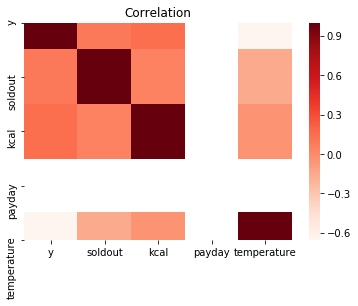

In [16]:
# matplotlib.pyplotのインポート
import matplotlib.pyplot as plt

# seabornのインポート
import seaborn as sns

# heatmapを作成
sns.heatmap(corr_matrix, cmap="Reds")

# グラフにタイトルを追加
plt.title('Correlation')

# グラフを表示
plt.show()

In [17]:
# yの値が1のデータを表示
# print( df[df['y']==1] )

# yの値が1のデータのdurationを表示
# print( df[df['y']==1]['duration'] )

In [18]:
#durationの抜き出し
# duration_0 = df[df['y']==0]['duration']
# duration_1 = df[df['y']==1]['duration']

# ヒストグラムの作成
# sns.distplot(duration_0, label='y=0')
# sns.distplot(duration_1, label='y=1')


# グラフにタイトルを追加
# plt.title('duration histgram')

# グラフのx軸に名前を追加
# plt.xlabel('duration')

# グラフのy軸に名前を追加
# plt.ylabel('frequency')

# x軸の表示範囲の指定
# plt.xlim(0, 2000)

# グラフに凡例を追加
# plt.legend()

# グラフを表示
# plt.show()

In [19]:
# カラムweekをダミー変数化し先頭5行を表示
print( pd.get_dummies(df['week']).head() )

            月  木  水  火  金
datetime                 
2013-11-18  1  0  0  0  0
2013-11-19  0  0  0  1  0
2013-11-20  0  0  1  0  0
2013-11-21  0  1  0  0  0
2013-11-22  0  0  0  0  1


In [20]:
# カラムnameをダミー変数化し先頭5行を表示
print( pd.get_dummies(df['name']).head() )

            いか天ぷら  かじきの甘辛煮  きのこソースハンバーグ  さっくりメンチカツ  さわら焼味噌掛け  さんま辛味焼  \
datetime                                                               
2013-11-18      0        0            0          0         0       0   
2013-11-19      0        0            0          0         0       0   
2013-11-20      0        0            0          0         0       0   
2013-11-21      0        0            0          0         0       0   
2013-11-22      0        0            0          0         0       0   

            たっぷりベーコンフライ  ひやしたぬきうどん・炊き込みご飯  ぶりレモンペッパー焼き  ますのマスタードソース  ...  \
datetime                                                             ...   
2013-11-18            0                 0            0            0  ...   
2013-11-19            0                 0            0            0  ...   
2013-11-20            0                 0            0            0  ...   
2013-11-21            0                 0            0            0  ...   
2013-11-22            0                

In [21]:
# カラムweatherをダミー変数化し先頭5行を表示
print( pd.get_dummies(df['weather']).head() )

            快晴  晴れ  曇  薄曇  雨  雪  雷電
datetime                           
2013-11-18   1   0  0   0  0  0   0
2013-11-19   1   0  0   0  0  0   0
2013-11-20   1   0  0   0  0  0   0
2013-11-21   1   0  0   0  0  0   0
2013-11-22   1   0  0   0  0  0   0


In [22]:
# データの列数の表示
print( df.shape[1] )

# ダミー変数化後のデータの列数の表示
print( pd.get_dummies(df).shape[1] )

11
189


In [23]:
# データのダミー変数化
df = pd.get_dummies(df)

# data_yに目的変数を代入
y_train = df['y']

# data_yの表示
print( y_train )

# data_Xに説明変数を代入
X_train = df.drop('y', axis=1)

# data_Xの表示
print( X_train )

datetime
2013-11-18     90
2013-11-19    101
2013-11-20    118
2013-11-21    120
2013-11-22    130
             ... 
2014-9-24      59
2014-9-25      50
2014-9-26      45
2014-9-29      56
2014-9-30      40
Name: y, Length: 207, dtype: int64
            soldout   kcal  payday  temperature  week_月  week_木  week_水  \
datetime                                                                  
2013-11-18        0    NaN     NaN         19.8       1       0       0   
2013-11-19        1    NaN     NaN         17.0       0       0       0   
2013-11-20        0    NaN     NaN         15.5       0       0       1   
2013-11-21        1    NaN     NaN         15.2       0       1       0   
2013-11-22        1    NaN     NaN         16.1       0       0       0   
...             ...    ...     ...          ...     ...     ...     ...   
2014-9-24         1  408.0     NaN         24.8       0       0       1   
2014-9-25         0  394.0     NaN         25.4       0       1       0   
2014-9-2

In [24]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import KFold

# ３分割交差検証を指定し、インスタンス化
kf = KFold(n_splits=3, shuffle=True)

# スコアとモデルを格納するリスト
score_list = []
models = []

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train[train_index]
    valid_y = y_train[valid_index]
    # lab.Datasetを使って、trainとvalidを作っておく
    lgb_train= lgb.Dataset(train_x, train_y)
    lgb_valid = lgb.Dataset(valid_x, valid_y)

#    lgbm_params = {'objective': 'regression'}
    # パラメータを定義
    lgbm_params = {'objective': 'regression'}                                                                                               
          
#    gbm = lgb.train(params = lgbm_params,
#                   train_set = lgb_train,
#                   valid_sets =[lgb_train,lgb_valid],
#                   early_stopping_rounds = 20,
#                   verbose_eval = -1 # 学習の状況を表示しない
#                   )
    # 学習
    gbm = lgb.train(params = lgbm_params, train_set = lgb_train, 
                    num_boost_round = 200,
                    valid_sets = [lgb_train, lgb_valid],
                    early_stopping_rounds = 10
                   )

    oof = (gbm.predict(valid_x) > 0.5).astype(int)
    score_list.append(round(accuracy_score(valid_y, oof)*100,2))
    models.append(gbm) # 学習が終わったモデルをリストに入れておく
    print(f'fold{fold_ + 1} end\n' )
print(score_list, '平均score', round(np.mean(score_list), 2))

fold1 start


LightGBMError: Do not support non-ascii characters in feature name.

In [ ]:
# テストデータの予測を格納する。418列3列のnumpy行列を作成
test_pred = np.zeros((len(test), 3))

for fold_, gbm in enumerate(models):
    pred_ = gbm.predict(test) # testを予測
    test_pred[:, fold_] = pred_

pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)
sample_submission['Survived'] = pred
sample_submission.to_csv('3-fold_cross-validation.csv',index=False)

In [ ]:
# 説明変数をdata_Xに、目的変数をdata_yに代入
data_X = df.drop('y', axis=1)
data_y = df['y']

# train_test_splitのインポート
from sklearn.model_selection import train_test_split

# 学習データと評価データにデータを分割
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.25, random_state=0)

# 学習用データの説明変数の行数の表示
print( train_X.shape[0])

# 評価用データの説明変数の行数の表示
print( test_X.shape[0])

In [ ]:
# 説明変数をdata_Xに、目的変数をdata_yに代入
data_X, data_y = df.drop('y', axis=1), df['y']

# train_test_splitのインポート
from sklearn.model_selection import train_test_split

# 学習データと評価データにデータを分割
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.25, random_state=0)

# 決定木モデルのインポート
from sklearn.tree import DecisionTreeClassifier as DT

# 決定木モデルの準備
tree = DT(max_depth = 2, random_state = 0)

# 決定木モデルの学習
tree.fit(train_X, train_y)

In [ ]:
# 重要度の表示
print( tree.feature_importances_ )

# 重要度に名前を付けて表示
print( pd.Series(tree.feature_importances_, index=train_X.columns) )

In [ ]:
# 評価用データの予測
pred_y1 = tree.predict_proba(test_X)[:,1]

# 予測結果の表示
print( pred_y1 )

In [ ]:
from sklearn.metrics import roc_auc_score

# 実測値test_y,予測値pred_y1を使ってAUCを計算 roc_auc_score(実測値, 予測値)
auc1 = roc_auc_score(test_y,pred_y1)

# 評価結果の表示
print( auc1 )

In [ ]:
# roc_curveのインポート
from sklearn.metrics import roc_curve

# 実測値test_yと予測値pred_y1を使って偽陽性率、真陽性率、閾値の計算
fpr, tpr, thresholds = roc_curve(test_y, pred_y1)

# ラベル名の作成
roc_label = 'ROC(AUC={:.2}, max_depth=2)'.format(auc1)

# ROC曲線の作成
plt.plot(fpr, tpr, label=roc_label)

# 対角線の作成
plt.plot([0.0, 1.0], [0.0, 1.0], color='black', linestyle='dashed')

# グラフにタイトルを追加
plt.title('ROC')

# グラフのx軸に名前を追加
plt.xlabel('FPR')

# グラフのy軸に名前を追加
plt.ylabel('TPR')

# x軸の表示範囲の指定
plt.xlim(0, 1)

# y軸の表示範囲の指定
plt.ylim(0, 1)

# 凡例の表示
plt.legend()

# グラフを表示
plt.show()

In [ ]:
# 決定木描画ライブラリのインポート
from sklearn.tree import export_graphviz

# 決定木グラフの出力
export_graphviz(tree, out_file="tree.dot", feature_names=train_X.columns, class_names=["0","1"], filled=True, rounded=True)

# 決定木グラフの表示
from matplotlib import pyplot as plt
from PIL import Image
import pydotplus
import io

g = pydotplus.graph_from_dot_file(path="tree.dot")
gg = g.create_png()
img = io.BytesIO(gg)
img2 = Image.open(img)
plt.figure(figsize=(img2.width/100, img2.height/100), dpi=100)
plt.imshow(img2)
plt.axis("off")
plt.show()

In [ ]:
# 決定木モデルの準備
tree = DT(max_depth=10, random_state = 0)

In [ ]:
# 決定木モデルの学習
tree.fit(train_X, train_y)

# 評価用データの予測
pred_y2 = tree.predict_proba(test_X)[:,1]

# AUCの計算
auc2 = roc_auc_score(test_y, pred_y2)

# 評価結果の表示
print( auc2 )

In [ ]:
# グリッドサーチのインポート
from sklearn.model_selection import GridSearchCV

# 決定木モデルの準備
tree = DT(random_state=0)

# パラメータの準備
parameters = {'max_depth':[2,3,4,5,6,7,8,9,10]}

# グリッドサーチの設定
gcv = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

In [ ]:
# グリッドサーチの実行
gcv.fit(train_X, train_y)

In [ ]:
# 評価スコアの取り出し
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
print(train_score)
print(test_score)

In [ ]:
# matplotlib.pyplotを省略名pltとしてインポート 
import matplotlib.pyplot as plt

# 学習に用いたデータを使って評価したスコアの描画
plt.plot([2,3,4,5,6,7,8,9,10], train_score, label="train_score")

# 学習には用いなかったデータを使って評価したスコアの描画
plt.plot([2,3,4,5,6,7,8,9,10], test_score, label="test_score")

# グラフにタイトルを追加
plt.title('train_score vs test_score')

# グラフのx軸に名前を追加
plt.xlabel('max_depth')

# グラフのy軸に名前を追加
plt.ylabel('AUC')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()

In [ ]:
# 最適なパラメータの表示
print( gcv.best_params_ )

# 最適なパラメータで学習したモデルの取得
best_model = gcv.best_estimator_

# 評価用データの予測
pred_y3 = best_model.predict_proba(test_X)[:,1]

# AUCの計算
auc3 = roc_auc_score(test_y, pred_y3)

# AUCの表示
print ( auc3 )

In [ ]:
# 偽陽性率、真陽性率、閾値の計算
# なお、予測結果は以下の変数に代入されているものとします。
# pred_y1：max_depth=2の場合の予測結果
# pred_y2：max_depth=10の場合の予測結果
# pred_y3：max_depth=6の場合の予測結果
# また、それぞれの戻り値を代入する変数は以下とします。
# fpr1,tpr1,thresholds1：max_depth=2の場合の偽陽性率、真陽性率、閾値
# fpr1,tpr1,thresholds1：max_depth=10の場合の偽陽性率、真陽性率、閾値
# fpr1,tpr1,thresholds1：max_depth=6の場合の偽陽性率、真陽性率、閾値
fpr1, tpr1, thresholds1 = roc_curve(test_y, pred_y1)
fpr2, tpr2, thresholds2 = roc_curve(test_y, pred_y2)
fpr3, tpr3, thresholds3 = roc_curve(test_y, pred_y3)

# ラベル名の作成
# なお、それぞれの戻り値を代入する変数は以下とします。
# roc_label1：max_depth=2の場合のラベル名
# roc_label2：max_depth=10の場合のラベル名
# roc_label3：max_depth=6の場合のラベル名
roc_label1='ROC(AUC={:.2}, max_depth=2)'.format(auc1)
roc_label2='ROC(AUC={:.2}, max_depth=10)'.format(auc2)
roc_label3='ROC(AUC={:.2}, max_depth=6)'.format(auc3)

In [ ]:
plt.plot(fpr1, tpr1, label=roc_label1.format(auc1))
plt.plot(fpr2, tpr2, label=roc_label2.format(auc2))
plt.plot(fpr3, tpr3, label=roc_label3.format(auc3))
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')
plt.title("ROC")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
# 決定木グラフの出力
export_graphviz(best_model, out_file="tree.dot", feature_names=train_X.columns, class_names=["0","1"], filled=True, rounded=True)

# 決定木グラフの表示
from matplotlib import pyplot as plt
from PIL import Image
import pydotplus
import io
g = pydotplus.graph_from_dot_file(path="tree.dot")
gg = g.create_png()
img = io.BytesIO(gg)
img2 = Image.open(img)
plt.figure(figsize=(img2.width/100, img2.height/100), dpi=100)
plt.imshow(img2)
plt.axis("off")
plt.show()

In [ ]:
print(pred_y3)
# 申込率を含むアタックリストの作成
attack_list = pd.DataFrame(index=test_X.index, data={"cvr":pred_y3})

# 期待できる収益の計算
attack_list['return'] = 2000 * attack_list["cvr"]

# 期待できるROIの計算
attack_list['ROI'] = attack_list['return'] / 300 * 100

# ROIで降順に並べ替え
attack_list = attack_list.sort_values('ROI', ascending=True)

# ROIが100%以上の顧客idを切り出し
attack_list = attack_list[attack_list['ROI'] >= 100.0]

# アタックリストの行数・列数の表示
print( attack_list.shape )

# アタックリストの先頭5行の表示
print( attack_list.head() )

In [ ]:
#採点するための投稿用ファイル作成
submit = pd.read_csv("../input/sample_submission.csv", header=None)

submit[1] = pred_y3
submit.to_csv("submit.csv", index=False, header=False)